In [1]:
import torch
import math
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import time

Coeficientes óptimos:
(25,)


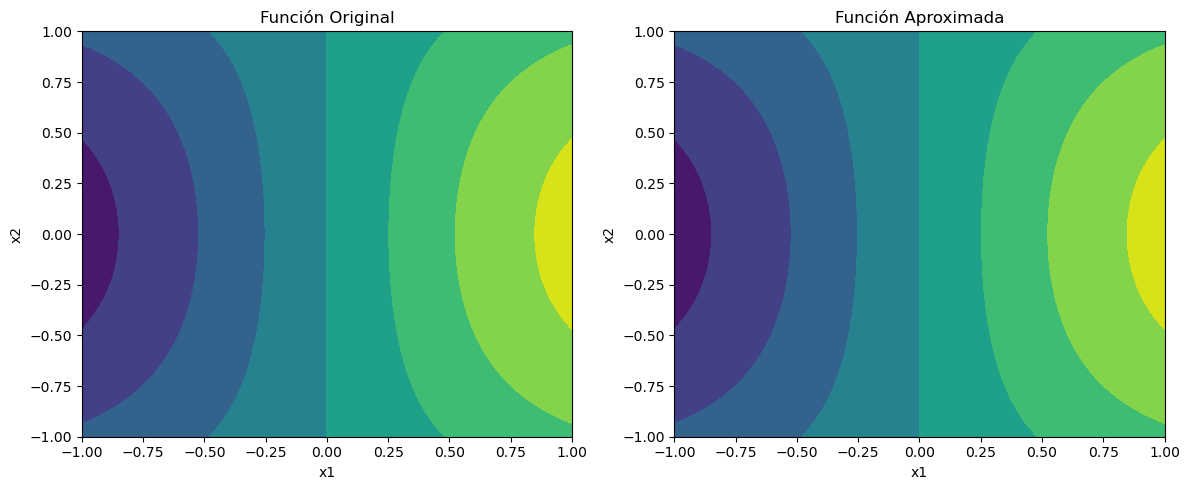

In [57]:
from scipy.optimize import minimize
import numpy as np
from numpy.polynomial import legendre as leg
import matplotlib.pyplot as plt

# Definición de la función original f(x1, x2) que queremos aproximar
def original_function(x1, x2):
    return np.sin(x1) * np.cos(x2)

# Definición de la función de error
def error_function(coefficients):
    approximation = leg.legval2d(X1, X2, coefficients.reshape((N, N)))
    error = np.sum((original_function(X1, X2) - approximation) ** 2)
    return error

# Parámetros de la optimización
N = 5  # Grado máximo de los polinomios de Legendre
initial_guess = np.zeros(N * N)  # Suposición inicial de los coeficientes
bounds = [(-1, 1)] * N * N  # Límites para los coeficientes

# Datos de entrada para la función original y los polinomios de Legendre
X1, X2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

# Optimización
result = minimize(error_function, initial_guess, bounds=bounds)

# Coeficientes óptimos encontrados
optimal_coefficients = result.x

print("Coeficientes óptimos:")
print(optimal_coefficients.shape)


# Definición de la función aproximada usando los coeficientes óptimos encontrados
def approximated_function(x1, x2):
    approximation = leg.legval2d(x1, x2, optimal_coefficients.reshape((N, N)))
    return approximation

# Datos de entrada para la visualización
X1_vis, X2_vis = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z_original = original_function(X1_vis, X2_vis)
Z_approximated = approximated_function(X1_vis, X2_vis)

# Visualización
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Función original
axs[0].contourf(X1_vis, X2_vis, Z_original, cmap='viridis')
axs[0].set_title('Función Original')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')

# Función aproximada
axs[1].contourf(X1_vis, X2_vis, Z_approximated, cmap='viridis')
axs[1].set_title('Función Aproximada')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')

plt.tight_layout()
plt.show()